HAND WRITTEN DIGIT PREDICTION MACHINE LEARNING MODEL
___________________________________________________________

OBJECTIVE- The primary objective of Handwritten Digit Prediction is to develop a system that can accurately recognize and classify handwritten digits (0-9) from images or scanned documents.

INSTALL TENSORFLOW

In [19]:
pip install tensorflow

IMPORT LIBRARIES

In [20]:
import tensorflow as tf

IMPORT DATASET

In [21]:
ds = tf.keras.datasets.mnist

DATASET INTO TRANING SET AND TESTING SET

In [22]:
(x_train, y_train), (x_test, y_test) = ds.load_data()

TRAIN TEST SPLIT

In [23]:
#normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

MODELING

In [24]:
#create model
model = tf.keras.models.Sequential()

In [25]:
model.add(tf.keras.layers.Flatten())

In [26]:
#adding input layer
model.add(tf.keras.layers.Dense(128, activation='relu',name='first'))
#ading hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu',name='second'))
model.add(tf.keras.layers.Dense(128, activation='relu',name='third'))
#output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [27]:
from re import VERBOSE
#training the data
#compiling the data
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1,verbose=2)

1875/1875 - 15s - loss: 0.2596 - accuracy: 0.9230 - 15s/epoch - 8ms/step


MODEL EVALUATION

In [28]:
#evaluate the data
score= model.evaluate(x_test, y_test, verbose=2)
print(score)

313/313 - 1s - loss: 0.1385 - accuracy: 0.9581 - 839ms/epoch - 3ms/step
[0.138496994972229, 0.9581000208854675]


PREDICATION

In [29]:
#predicting test set results
predictions = model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


In [30]:
print(predictions)

[[1.02396875e-07 5.80882897e-07 1.05401312e-04 ... 9.99725699e-01
  7.68538541e-07 1.27795965e-05]
 [5.86929718e-06 8.35887250e-03 9.86514032e-01 ... 1.36374956e-05
  1.95282185e-03 1.68073200e-06]
 [5.79495349e-07 9.99479949e-01 1.74918605e-05 ... 1.64649857e-04
  1.21835619e-04 8.98783219e-06]
 ...
 [8.37907663e-08 1.34472493e-05 2.21807795e-06 ... 2.89578980e-04
  1.80794523e-05 9.60514415e-04]
 [2.15697182e-05 2.68661279e-05 1.27346993e-06 ... 1.89327284e-06
  2.07059621e-03 4.69464476e-06]
 [4.10418397e-05 1.59472233e-06 8.68972165e-06 ... 1.55666172e-07
  1.38192227e-05 9.08831680e-07]]


7


<function matplotlib.pyplot.show(close=None, block=None)>

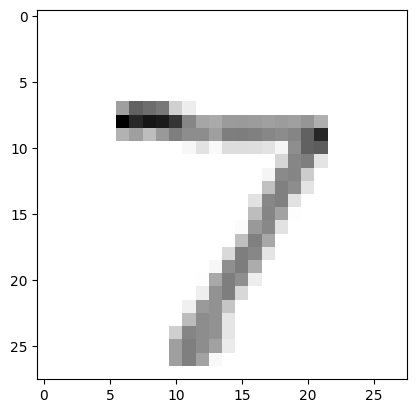

In [31]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show

In [32]:
#adding prediction to a new array of the same size as of y_test
d=y_test
for i in range(10000):
  d[i]=np.argmax(predictions[i], axis=0)


In [33]:
#accuracy of the model by r-squared method
from sklearn.metrics import r2_score
r2_score(d,y_test)

1.0

EXPLAINATION -